In [ ]:
'''
data_array = [
(19.00000000, 365.149813, 169.294290),
(19.25000000, 425.199931, 178.806443),
(19.50000000, 513.171405, 202.283296),
(19.75000000, 712.523321, 244.784065),
(20.00000000, 966.080948, 376.875250),
(20.25000000, 1361.55769, 494.708712),
(20.50000000, 1807.64873, 586.642867),
(18.75000000, 415.805144, 191.172220),
(18.50000000, 541.516375, 236.716033),
(18.25000000, 720.722694, 328.359542),
(18.00000000, 964.315251, 446.496222),
(17.75000000, 1281.34952, 543.940878),
(17.50000000, 1739.16612, 669.486148),
(17.00000000, 2686.77511, 811.070784),
(16.00000000, 5260.66535, 1076.035956),
(15.00000000, 8766.50073, 1799.66114),
(14.00000000, 13113.7650, 2889.48734),
(13.00000000, 17996.5232, 4149.67677),
(21.00000000, 2933.88806, 893.932228),
(22.00000000, 6350.86734, 1697.84097),
(23.00000000, 10144.5319, 2594.19953),
(24.00000000, 15431.5668, 3293.53776),
(25.00000000, 20519.2706, 5094.98579),
#TEM10
]#cm-像素平方
'''

width_squared_datax_cm: [6.30033051e-05 6.97095961e-05 8.40004430e-05 1.05913849e-04
 1.14963633e-04 1.62025365e-04 2.15110199e-04 4.94808121e-05
 6.44404486e-05 8.57660006e-05 1.14753515e-04 1.52480593e-04
 2.06960768e-04 3.19726238e-04 6.26019177e-04 1.04321359e-03
 1.56053803e-03 2.14158626e-03 3.49132679e-04 6.52420207e-04
 1.10173250e-03 1.68151846e-03 2.39421031e-03]
width_squared_datax_cm_mean: 0.0005808133034556086
width_squared_datax_cm_sig: 0.0007031709447222226
x Fitting Results:
W0_x (Beam Waist Radius/cm): 0.007981256731620697
z0_x (Beam Waist Position/cm): 18.946495455634
M_squaredx: 3.1486824653538976
x Calculated Rayleigh distance and Theta:
zR0_x (Rayleigh Length/cm): 3.1624667205292525
zRM_x (Rayleigh Length/cm): 1.0043777850980617
Theta0_x (radians): 0.0025237441013402973
ThetaM_x (radians): 0.007946468798930524
x parameters before lens:
W0_1x (Beam Waist Radius before lens/cm): 0.04102189334325675
z0_1x (Beam Waist Position before lens/cm): 93.83852829330307
zRM_1x 

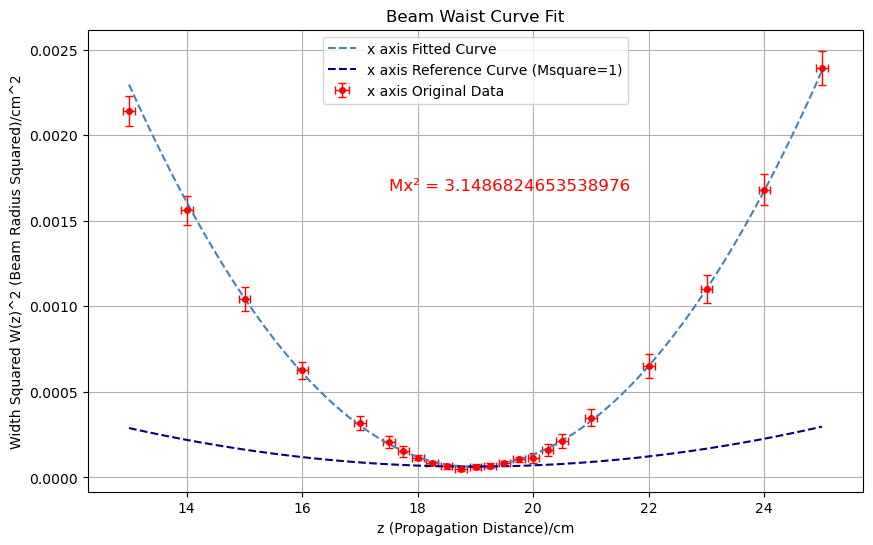

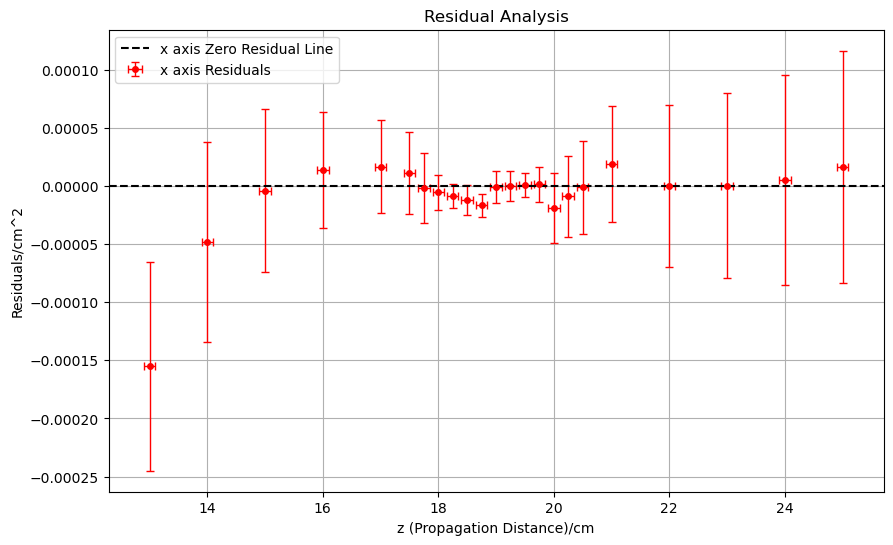

width_squared_datay_cm: [2.01460205e-05 2.12779667e-05 2.76417122e-05 3.38893037e-05
 4.96081547e-05 5.88703367e-05 6.98105012e-05 2.27494942e-05
 2.81692079e-05 3.90747855e-05 4.95630504e-05 5.99689645e-05
 7.37188516e-05 6.08174233e-05 1.16148279e-04 2.37959676e-04
 3.43848993e-04 4.93811536e-04 1.06377935e-04 1.66343075e-04
 2.73009744e-04 4.03830993e-04 6.06303309e-04]
width_squared_datay_cm_mean: 0.00014621475277591304
width_squared_datay_cm_sig: 0.000163691766103679
y Fitting Results:
W0_y (Beam Waist Radius/cm): 0.005449381818580671
z0_y (Beam Waist Position/cm): 18.7989545074789
M_squaredy: 1.0040501035120921
y Calculated Rayleigh distance and Theta:
zR0_y (Rayleigh Length/cm): 1.4742728885108172
zRM_y (Rayleigh Length/cm): 1.468326016155888
Theta0_y (radians): 0.0036963182739425974
ThetaM_y (radians): 0.0037112887455657026
y parameters before lens:
W0_1y (Beam Waist Radius before lens/cm): 0.027585553527925546
z0_1y (Beam Waist Position before lens/cm): 87.72404405986988
zRM_1

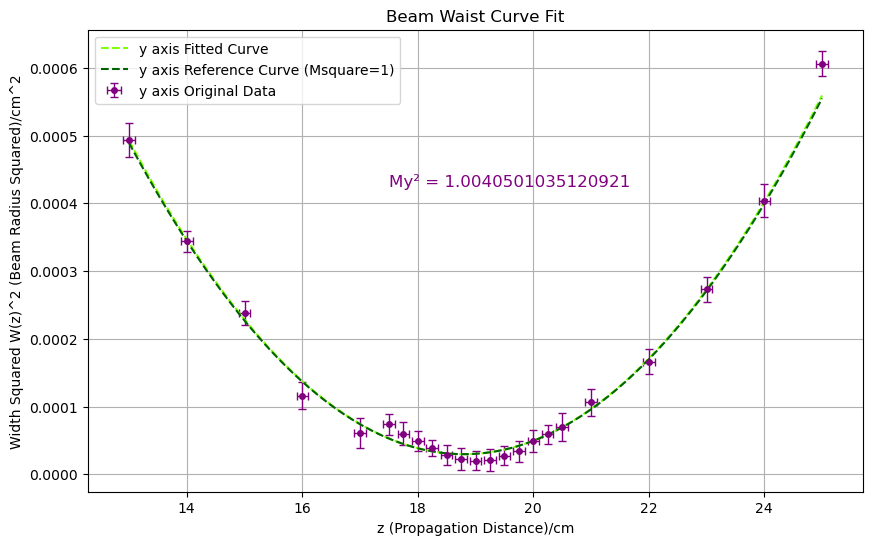

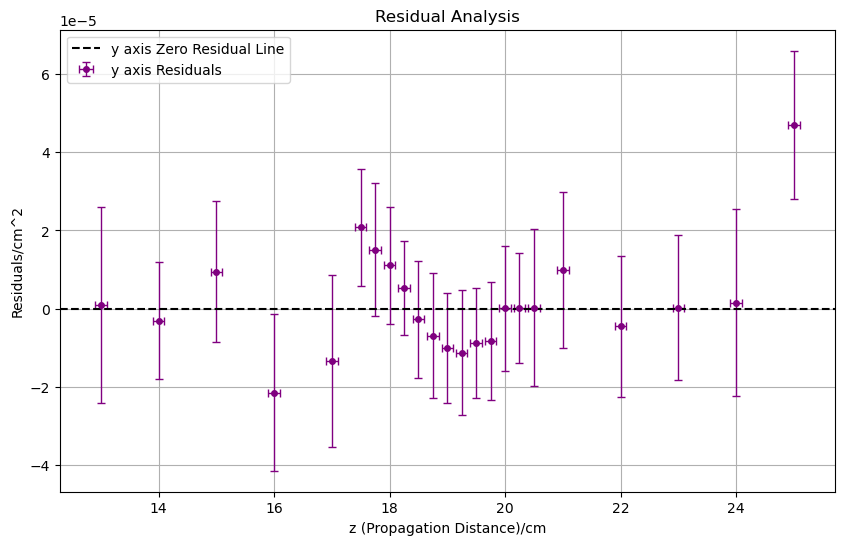

In [121]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义拟合公式
def beam_waist_curve(z, W0, z0, M_squared):
    """
    光束传播公式的平方形式：
    W(z)^2 = W0^2 * (1 + M_squared**2 *((z - z0)^2) / (np.pi * W0_fit**2 / 632.8e-07)^2)
    
    Parameters:
        z  : Propagation distance
        W0 : Beam waist radius
        z0 : Beam waist position
        zR0 : Rayleigh length=pai*w0^2/lamda
        M_squared
    Returns:
        Beam width radius squared W(z)^2 at propagation distance z
    """
    return W0**2 * (1 + (M_squared**2)*((z - z0)**2) / ((np.pi * W0**2 / 632.8e-07)**2))#z-cm z0-cm W0-cm W0-cm^2 lamda-632.8e-07cm

# 测量数据 (z, W(z)^2)

data_array = [
(19.00000000, 529.439539, 169.294290),
(19.25000000, 585.794925, 178.806443),
(19.50000000, 705.886076, 232.283296),
(19.75000000, 890.032346, 284.784065),
(20.00000000, 966.080948, 416.875250),
(20.25000000, 1361.557690, 494.708712),
(20.50000000, 1807.648730, 586.642867),
(18.75000000, 415.805144, 191.172220),
(18.50000000, 541.516375, 236.716033),
(18.25000000, 720.722694, 328.359542),
(18.00000000, 964.315251, 416.496222),
(17.75000000, 1281.349520, 503.940878),
(17.50000000, 1739.166120, 619.486148),
(17.00000000, 2686.775110, 511.070784),
(16.00000000, 5260.665350, 976.035956),
(15.00000000, 8766.500730, 1999.661140),
(14.00000000, 13113.765000, 2889.487340),
(13.00000000, 17996.523200, 4149.676770),
(21.00000000, 2933.888060, 893.932228),
(22.00000000, 5482.522745, 1397.840970),
(23.00000000, 9258.256281, 2294.199530),
(24.00000000, 14130.407247, 3393.537760),
(25.00000000, 20119.414360, 5094.985790),
#TEM10
]#cm-像素平方



z_width_squared_data = data_array
# 转换为 NumPy 数组
z_data, width_squared_datax, width_squared_datay = zip(*z_width_squared_data) #cm-像素平方
z_data = np.array(z_data) #cm
width_squared_datax= np.array(width_squared_datax) * 11.9e-08 #cm^2 
width_squared_datay= np.array(width_squared_datay) * 11.9e-08 #cm^2 
print("width_squared_datax_cm:",width_squared_datax)
#x axis
# 初步估计初始参数 (W0, z0)
W0_initialx = np.sqrt(min(width_squared_datax))  # Take the square root of the minimum W^2
z0_initialx = z_data[np.argmin(width_squared_datax)]  # The z value corresponding to the minimum W
M_squared_initialx = 1
initial_guessx = [W0_initialx, z0_initialx, M_squared_initialx]


# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datax**1)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datax**2

mu = np.mean(width_squared_datax)  # 取均值作为中心
sig = np.std(width_squared_datax)  # 取标准差决定宽度
print("width_squared_datax_cm_mean:",mu)
print("width_squared_datax_cm_sig:",sig)
weights = np.exp(-((width_squared_datax - 1*mu) ** 2) / (2 * sig ** 2)) #============================================================================= XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 进行非线性加权最小二乘法拟合
poptx, pcovx = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datax,
    p0=initial_guessx,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fitx, z0_fitx, M_squaredx = poptx
print("x Fitting Results:")
print(f"W0_x (Beam Waist Radius/cm): {W0_fitx}")  # Fitted beam waist radius W0
print(f"z0_x (Beam Waist Position/cm): {z0_fitx}")
print(f"M_squaredx: {M_squaredx}")

print("x Calculated Rayleigh distance and Theta:")
zR0x=(np.pi * W0_fitx**2 / 632.8e-07)#cm
print(f"zR0_x (Rayleigh Length/cm): {zR0x}")
zRMx=zR0x/M_squaredx#cm
print(f"zRM_x (Rayleigh Length/cm): {zRMx}")
theta0_radx=(632.8e-07/(np.pi * W0_fitx) )#radians
print(f"Theta0_x (radians): {theta0_radx}")
thetaM_radx=M_squaredx * theta0_radx#radians
print(f"ThetaM_x (radians): {thetaM_radx}")

# 透镜前原光束参数
print("x parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fitx-f)**2+zRMx**2)#转换系数
W0_1x=(T**(1/2))*W0_fitx#cm
print(f"W0_1x (Beam Waist Radius before lens/cm): {W0_1x}")
z0_1x=f+T*(z0_fitx-f)
print(f"z0_1x (Beam Waist Position before lens/cm): {z0_1x}")
zRM_1x=T*(zRMx)
print(f"zRM_1x (Rayleigh Length before lens/cm): {zRM_1x}")
M_squared_1x=(np.pi * W0_1x**2)/(zRM_1x*632.8e-07)
print(f"M_squared_1x: {M_squared_1x}")
thetaM_rad_1x=M_squared_1x *(632.8e-07/(np.pi * W0_1x) )#radians
print(f"ThetaM_1x before lens/radians: {thetaM_rad_1x}")

# 生成拟合曲线
z_fit = np.linspace(min(z_data), max(z_data), 500)
width_squared_fitx = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squaredx)
width_squared_fit0x = beam_waist_curve(z_fit, W0_fitx, z0_fitx, M_squared=1)

error_band_width_squaredx = np.array([
    0.000014, 0.000013, 0.00001, 0.000015, 0.00003, 0.000035, 0.00004,
    0.00001, 0.000013, 0.00001, 0.000015, 0.00003, 0.000035, 0.00004,
    0.00005, 0.00007, 0.000086, 0.00009,
    0.00005, 0.00007, 0.00008, 0.00009, 0.0001,   
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差


plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datax, label="x axis Original Data", color="red")
plt.errorbar(z_data, width_squared_datax, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fitx, label="x axis Fitted Curve", linestyle="--", color="steelblue")
plt.plot(z_fit, width_squared_fit0x, label="x axis Reference Curve (Msquare=1)", linestyle="--", color="navy")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datax), f"Mx² = {M_squaredx}", fontsize=12, color="red")
plt.show()

# 残差分析
residuals_x = width_squared_datax - beam_waist_curve(z_data, *poptx)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_x, color="red", label="Residuals")
plt.errorbar(z_data, residuals_x, 
             xerr=error_band_z, yerr=error_band_width_squaredx, 
             fmt='o', color="red", label="x axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="x axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()

#y axis
print("width_squared_datay_cm:",width_squared_datay)
# 初步估计初始参数 (W0, z0)
W0_initialy = np.sqrt(min(width_squared_datay))  # Take the square root of the minimum W^2
z0_initialy = z_data[np.argmin(width_squared_datay)]  # The z value corresponding to the minimum W
M_squared_initialy = 1
initial_guessy = [W0_initialy, z0_initialy, M_squared_initialy]

# 定义权重，权重与测量值成反比
# 如果测量误差未知，这里假设权重为 1 / width_squared
#weights = 1/(width_squared_datay**1.3)
# 如果测量误差未知，这里假设权重为 width_squared
#weights = 1/width_squared_datay**2
#高斯权重
mu = np.mean(width_squared_datay)  # 中心最高值
sig = np.std(width_squared_datay)  # 宽度
print("width_squared_datay_cm_mean:",mu)
print("width_squared_datay_cm_sig:",sig)
weights = np.exp(-((width_squared_datay - 1.5*mu) ** 2) / (2 * sig ** 2)) #============================================================================= YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
# 进行非线性加权最小二乘法拟合
popty, pcovy = curve_fit(
    beam_waist_curve,
    z_data,
    width_squared_datay,
    p0=initial_guessy,
    sigma=1/weights  # 设置权重
)

# 获取拟合参数
W0_fity, z0_fity, M_squaredy = popty
print("y Fitting Results:")
print(f"W0_y (Beam Waist Radius/cm): {W0_fity}")  # Fitted beam waist radius W0
print(f"z0_y (Beam Waist Position/cm): {z0_fity}")
print(f"M_squaredy: {M_squaredy}")
print("y Calculated Rayleigh distance and Theta:")
zR0y=(np.pi * W0_fity**2 / 632.8e-07)#cm
print(f"zR0_y (Rayleigh Length/cm): {zR0y}")
zRMy=zR0y/M_squaredy#cm
print(f"zRM_y (Rayleigh Length/cm): {zRMy}")
theta0_rady=(632.8e-07/(np.pi * W0_fity) )#radians
print(f"Theta0_y (radians): {theta0_rady}")
thetaM_rady=M_squaredy * theta0_rady#radians
print(f"ThetaM_y (radians): {thetaM_rady}")

# 透镜前原光束参数
print("y parameters before lens:")
f=16#cm,焦距
T=f**2/((z0_fity-f)**2+zRMy**2)#转换系数
W0_1y=(T**(1/2))*W0_fity#cm
print(f"W0_1y (Beam Waist Radius before lens/cm): {W0_1y}")
z0_1y=f+T*(z0_fity-f)
print(f"z0_1y (Beam Waist Position before lens/cm): {z0_1y}")
zRM_1y=T*(zRMy)
print(f"zRM_1y (Rayleigh Length before lens/cm): {zRM_1y}")
M_squared_1y=(np.pi * W0_1y**2)/(zRM_1y*632.8e-07)
print(f"M_squared_1y: {M_squared_1y}")
thetaM_rad_1y=M_squared_1y *(632.8e-07/(np.pi * W0_1y) )#radians
print(f"ThetaM_1y before lens/radians: {thetaM_rad_1y}")

# 生成拟合曲线
width_squared_fity = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squaredy)
width_squared_fit0y = beam_waist_curve(z_fit, W0_fity, z0_fity, M_squared=1)

error_band_width_squaredy = np.array([
    0.000014, 0.000016, 0.000014, 0.000015, 0.000016, 0.000014, 0.00002,
    0.000016, 0.000015, 0.000012, 0.000015, 0.000017, 0.000015, 0.000022,
    0.00002, 0.000018, 0.000015, 0.000025,
    0.00002, 0.000018, 0.0000185, 0.000024, 0.000019,   
])  # W(z)^2 误差
error_band_z = np.array([0.1] * len(z_data))    # z 轴误差

# 绘制图像
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, width_squared_datay, label="y axis Original Data", color="purple")
plt.errorbar(z_data, width_squared_datay, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Original Data", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.plot(z_fit, width_squared_fity, label="y axis Fitted Curve", linestyle="--", color="chartreuse")
plt.plot(z_fit, width_squared_fit0y, label="y axis Reference Curve (Msquare=1)", linestyle="--", color="darkgreen")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Width Squared W(z)^2 (Beam Radius Squared)/cm^2")
plt.title("Beam Waist Curve Fit")
plt.legend()
plt.grid()
plt.text(0.7 * max(z_data), 0.7 * max(width_squared_datay), f"My² = {M_squaredy}", fontsize=12, color="purple")
plt.show()

# 残差分析
residuals_y = width_squared_datay - beam_waist_curve(z_data, *popty)
plt.figure(figsize=(10, 6))
#plt.scatter(z_data, residuals_y, color="purple", label="Residuals")
plt.errorbar(z_data, residuals_y, 
             xerr=error_band_z, yerr=error_band_width_squaredy, 
             fmt='o', color="purple", label="y axis Residuals", capsize=3, capthick=1, elinewidth=1, markersize=4)
plt.axhline(0, color="black", linestyle="--", label="y axis Zero Residual Line")
plt.xlabel("z (Propagation Distance)/cm")
plt.ylabel("Residuals/cm^2")
plt.title("Residual Analysis")
plt.legend()
plt.grid()
plt.show()